# Introduction

This question came up during a Journal Club meeting, in which we were discussing the difference between KL divergence and MSE as a deep learning metric. The paper of interest is [here](https://www.biorxiv.org/content/early/2016/10/17/081380); in it, the loss function is KL divergence between a transcription start site sequencing (TSS-Seq) data and its predictions.

In order to probe this further, I decided to run some simulations. Here are the results.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy
from sklearn.metrics import mean_squared_error as mse
from matplotlib.gridspec import GridSpec

%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Data

Let's simulate what the TSS-Seq data will look like. It is essentially a vector of numbers. Real TSS-Seq data will have a peak centered on a certain place; in this case, I'll just draw random integers.

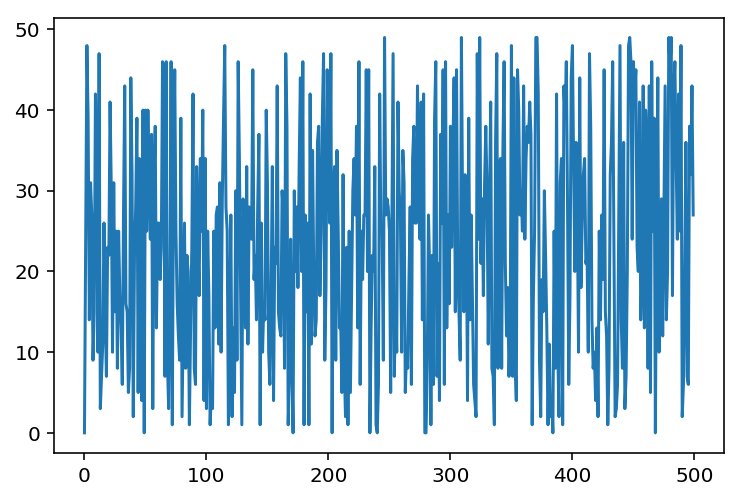

In [2]:
tss_data = np.random.randint(low=0, high=50, size=(500,))
plt.plot(tss_data)

# Loss Functions

We can use MSE as a loss function. MSE between a data and itself should be zero.

In [6]:
def mse(a, b, axis=0):
    """
    Compute MSE per axis.
    """
    diff_sq = (a - b)**2
    
    return diff_sq.mean(axis=axis)

In [7]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [8]:
mse(sigmoid(tss_data), sigmoid(tss_data))

0.0

[KL-divergence](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.entropy.html) between a dataset and itself should also be zero.

In [59]:
entropy(sigmoid(tss_data), sigmoid(tss_data))

0.0

# Comparing two random vectors.

/Users/maer3/anaconda/envs/tensor-fun/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


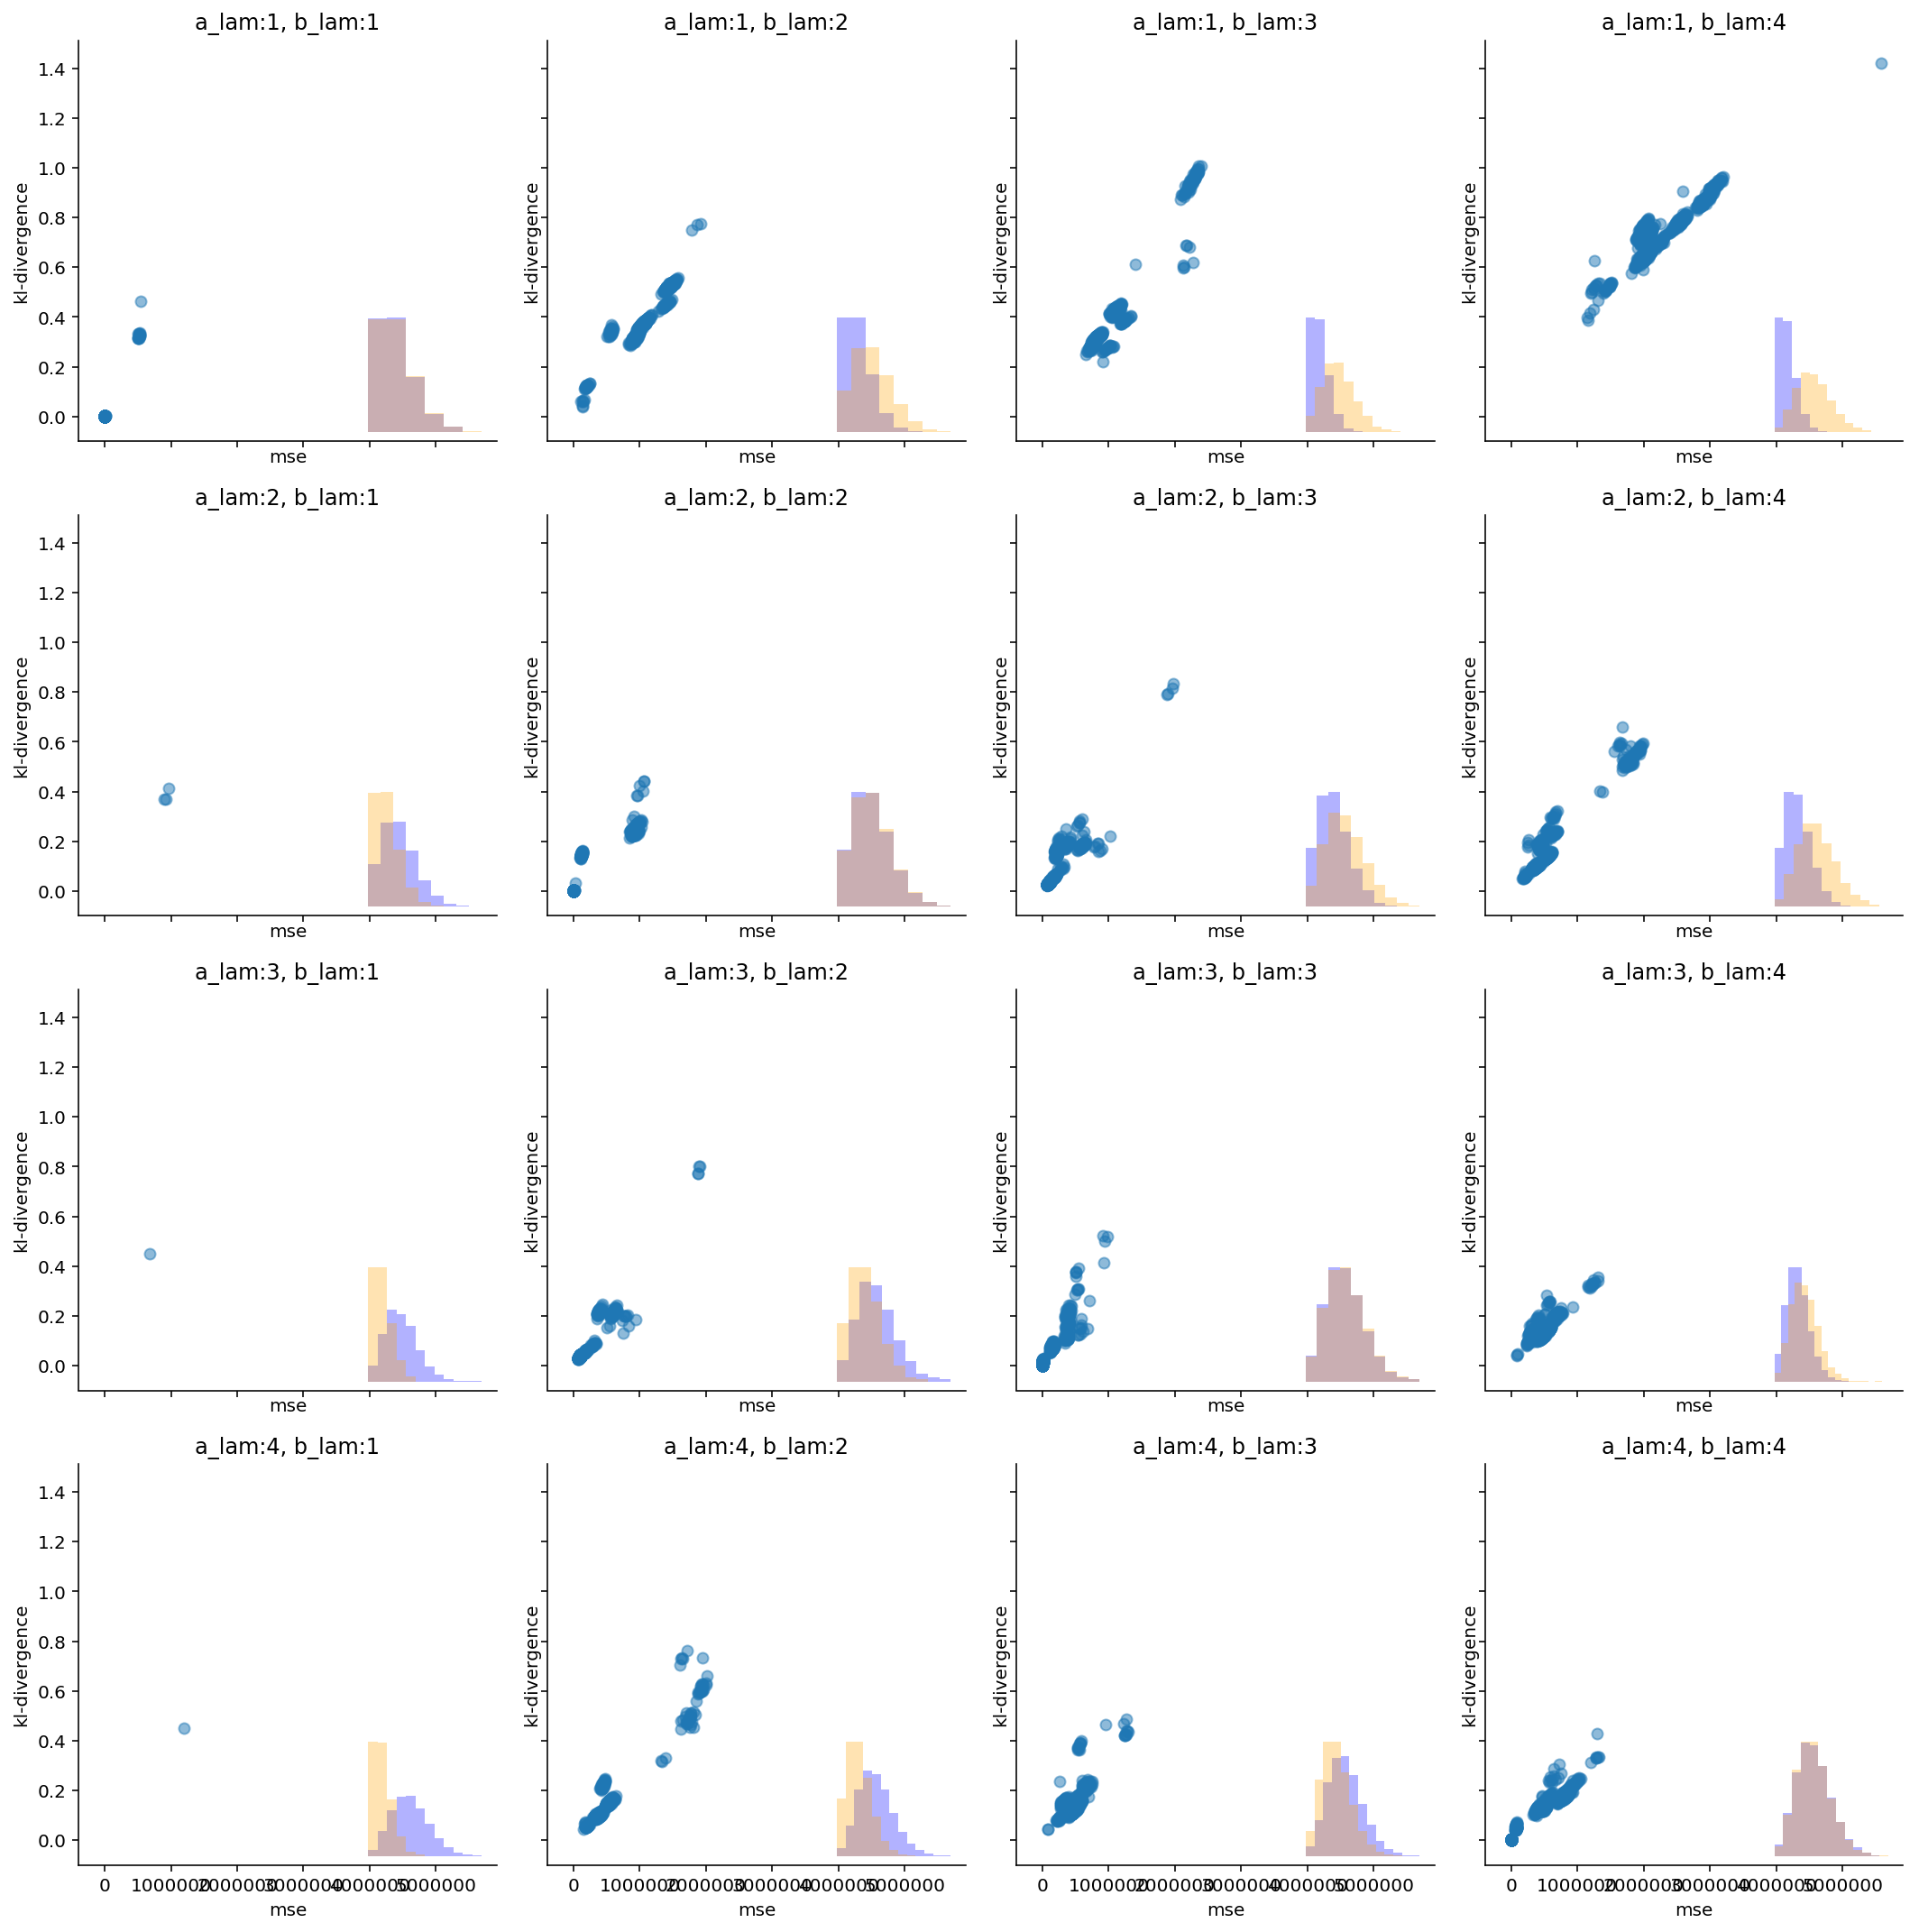

In [182]:
from itertools import product
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes

def compare_kl_mse(ax, a_lam=0, b_lam=0):
    
    mses = []
    entropys = []
    for i in range(1000):
        a_draws = np.random.poisson(a_lam, size=10000)
        a = np.histogram(a_draws)[0]
        
        b_draws = np.random.poisson(b_lam, size=10000)
        b = np.histogram(b_draws)[0]
        mses.append(mse(a, b))
        entropys.append(entropy(a/a.sum(), b/b.sum()))
        
    
    ax.scatter(mses, entropys, alpha=0.5)
    ax.set_xlabel('mse')
    ax.set_ylabel('kl-divergence')
    ax.set_title(f'a_lam:{a_lam}, b_lam:{b_lam}')

    # Inset histogram of distribution
    ax_ins = inset_axes(ax, width="30%", height="30%", loc=4)
    ax_ins.hist(a_draws, normed=True, bins=np.arange(min(a_draws), max(a_draws)), color='blue', alpha=0.3)
    ax_ins.hist(b_draws, normed=True, bins=np.arange(min(b_draws), max(b_draws)), color='orange', alpha=0.3)
    ax_ins.patch.set_alpha(0)
    despine(ax_ins)
    remove_ticks(ax_ins)
    return ax


def remove_ticks(ax):
    """
    Remove all ticks and tick labels from an axes.
    """
    ax.set_xticks([])
    ax.set_xticklabels([])
    ax.set_yticks([])
    ax.set_yticklabels([])


def despine(ax):
    """
    Remove all spines from an axes.
    """
    for spine in ['top', 'right', 'bottom', 'left']:
        ax.spines[spine].set_visible(False)


def format_ax(ax, i, j, nrows, ncols):
    """
    Formats the axes object to be nice-looking.
    """
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    return ax


nrows = 4
ncols = 4
fig, axes = plt.subplots(nrows, ncols, figsize=(15,15), sharex=True, sharey=True)
for i, j in product(range(1, nrows+1), range(1, ncols+1)):
    ax = axes[i-1, j-1]
    ax = compare_kl_mse(ax, a_lam=i, b_lam=j)
    ax = format_ax(ax, i-1, j-1, nrows, ncols)
plt.tight_layout()


In [178]:
a_lam = 3
b_lam = 4

mses = []
entropys = []
for i in range(1000):
    a_draws = np.random.poisson(a_lam, size=10000)
    a = np.histogram(a_draws)[0]

    b_draws = np.random.poisson(b_lam, size=10000)
    b = np.histogram(b_draws)[0]
    
    mses.append(mse(a, b))
    entropys.append(entropy(a/a.sum(), b/b.sum()))


In [180]:
np.arange(1, 10)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])